In [5]:
import geopandas as gp
import json

def getMaskGdf1MinusGdf2(gdf1, gdf2):
    mask_gdf = []
    for index, orig in gdf1.iterrows():
        found = False
        for index2, ref in gdf2.iterrows():      
            if not found and ref['geometry'] is not None and orig['geometry'] is not None and ref['geometry'].intersects(orig['geometry']): 
                found = True
        mask_gdf.append(found)
    return mask_gdf

data_path = "/Users/filipkrasniqi/Documents/Datasets.tmp/cablatura/"
data_agcom_path, data_boundaries, region_data_boundaries = "{}{}".format(data_path, "AGCOM_BBmap_EU_GRID1km/"), "{}{}".format(data_path, "Limiti01012020_g/Com01012020_g/"),"{}{}".format(data_path, "Limiti01012020_g/Reg01012020_g/")

In [83]:
gdf = gp.read_file("{}{}".format(data_agcom_path, "AGCOM_BBmap_coverage_grid1km_2018_december.shp"))

<AxesSubplot:>

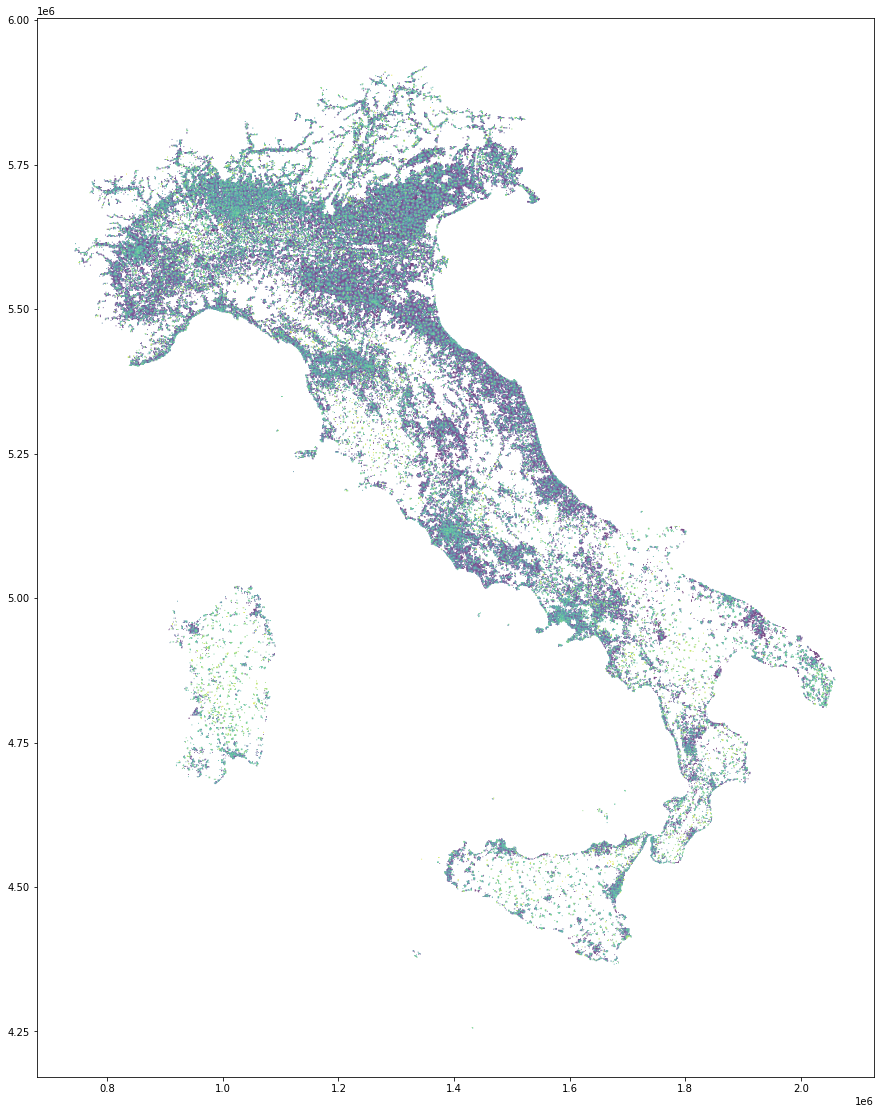

In [112]:
gdf.plot(figsize=(15, 40), column="speed_down")

In [85]:
boundaries = gp.read_file("{}{}".format(data_boundaries, "Com01012020_g_WGS84.shp"))

In [86]:
roma_boundaries = boundaries.loc[boundaries["COMUNE"]=="Roma"]
milano_boundaries = boundaries.loc[boundaries["COMUNE"]=="Milano"]
torino_boundaries = boundaries.loc[boundaries["COMUNE"]=="Torino"]

In [87]:
gdf.dropna(inplace=True)
gdf = gdf.to_crs("EPSG:3395")
roma_boundaries = roma_boundaries.to_crs("EPSG:3395")
milano_boundaries = milano_boundaries.to_crs("EPSG:3395")
torino_boundaries = torino_boundaries.to_crs("EPSG:3395")

In [89]:
roma_coverage = gdf[getMaskGdf1MinusGdf2(gdf, roma_boundaries)]
milano_coverage = gdf[getMaskGdf1MinusGdf2(gdf, milano_boundaries)]
torino_coverage = gdf[getMaskGdf1MinusGdf2(gdf, torino_boundaries)]

In [93]:
roma_coverage.head()

,OBJECTID,grid_id_1k,speed_down,speed_do_1,speed_do_2,speed_up_a,speed_up_v,speed_up_e,EU_speed,isFTTH,penetratio,penetrat_1,shape_Leng,shape_Area,geometry
3461,3462,1kmN2069E4532,1.490333,0.000000,32.672353,0.129000,8.468824,0.000000,10 - 30,0.0,0.428571428*,0.242857142*,5359.210006,1.795006e+06,"POLYGON ((1394313.368 5086470.512, 1394354.674..."
3475,3476,1kmN2070E4537,8.603889,0.000000,81.017778,0.542941,29.288889,0.000000,100 - 250,1.0,1,0.5625,5359.830602,1.795422e+06,"POLYGON ((1401012.984 5087585.111, 1401055.283..."
3494,3495,1kmN2071E4518,1.110990,26.025000,26.025000,0.073367,5.152797,5.152797,10 - 30,0.0,0.855932203*,1,5361.042447,1.796235e+06,"POLYGON ((1375748.468 5089761.370, 1375787.071..."
3495,3496,1kmN2071E4536,4.161011,25.430000,25.156000,0.396765,6.130000,6.130000,30 - 50,1.0,0.962732919*,0.031055900*,5360.603404,1.795940e+06,"POLYGON ((1399723.450 5088972.636, 1399765.570..."
3512,3513,1kmN2072E4519,1.428328,76.894944,56.808164,0.116498,17.474359,17.474359,50 - 100,1.0,0.997940267*,0.997940267*,5361.766841,1.796721e+06,"POLYGON ((1377119.305 5091061.472, 1377158.119..."


In [109]:
roma_coverage["speed_down"].mean(), roma_coverage["speed_do_1"].mean(), roma_coverage["speed_do_2"].mean()

(6.630763350018573, 62.793979570758005, 42.71734236021919)

In [110]:
milano_coverage["speed_down"].mean(), milano_coverage["speed_do_1"].mean(), milano_coverage["speed_do_2"].mean()

(8.42539428715214, 68.43134012964079, 47.119119784521395)

In [111]:
torino_coverage["speed_down"].mean(), torino_coverage["speed_do_1"].mean(), torino_coverage["speed_do_2"].mean()

(8.023976991297408, 82.95349393353025, 50.209318066825205)

<AxesSubplot:>

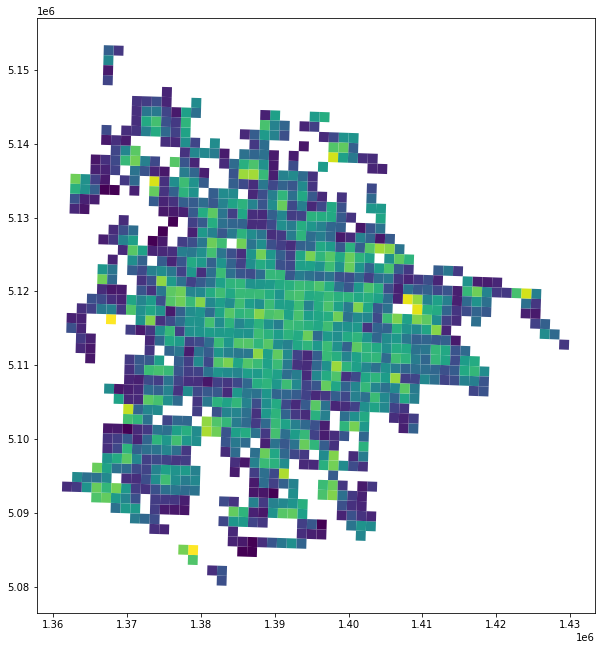

In [99]:
roma_coverage.plot(column='speed_down', figsize=(10, 15))

<AxesSubplot:>

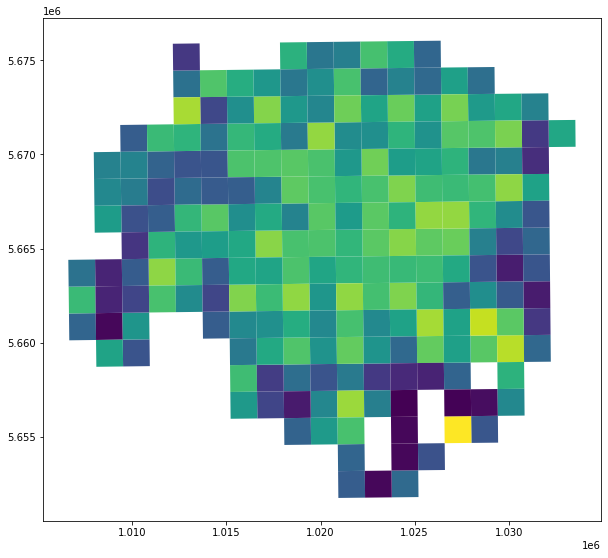

In [103]:
milano_coverage.plot(column='speed_down', figsize=(10, 15))

<AxesSubplot:>

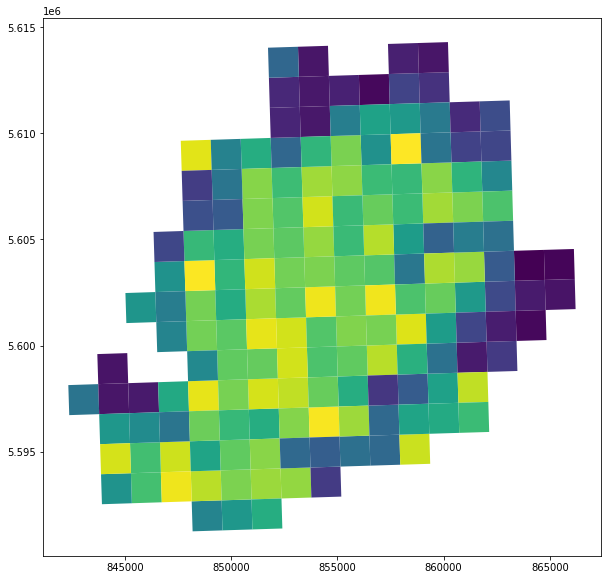

In [104]:
torino_coverage.plot(column='speed_down', figsize=(10, 15))

In [2]:
region_boundaries = gp.read_file("{}{}".format(region_data_boundaries, "Reg01012020_g_WGS84.shp"))

<AxesSubplot:>

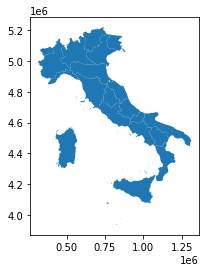

In [3]:
region_boundaries.plot()

In [6]:
region_boundaries.to_file("{}/boundaries.json".format(region_data_boundaries), driver = "GeoJSON")
with open("{}/boundaries.json".format(region_data_boundaries)) as geofile:
    j_file = json.load(geofile)

{'type': 'FeatureCollection', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::32632'}}, 'features': [{'type': 'Feature', 'properties': {'COD_RIP': 1, 'COD_REG': 1, 'DEN_REG': 'Piemonte', 'SHAPE_AREA': 25393901116.6, 'SHAPE_LEN': 1235512.06992}, 'geometry': {'type': 'Polygon', 'coordinates': [[[457749.4639999997, 5145501.795399999], [458662.39460000023, 5144277.8046], [458923.33050000016, 5143644.8092], [458939.4562999997, 5143604.81], [458969.0497000003, 5143462.8109], [458973.2357999999, 5143397.8121], [458943.2368999999, 5143286.8113], [458900.2374, 5143174.8131], [458857.2379, 5143097.8127999995], [458795.1451000003, 5143015.8135], [458700.33160000015, 5142946.8149999995], [458608.1456000004, 5142881.8138], [458496.1453999998, 5142813.8146], [458435.05399999954, 5142747.816299999], [458328.3969999999, 5142500.8168], [458321.0530000003, 5141465.8244], [458326.45969999954, 5141118.8281], [458400.14630000014, 5140914.828299999], [458434.3354000002, 5140852.8298], 